**Author: SHOBHIT VISHWAKARMA**

In [1]:
#importing the required libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# Reading the dataset

df=pd.read_csv('http://bit.ly/w-data')
print('Student Scores')
df.head(8)

Student Scores


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


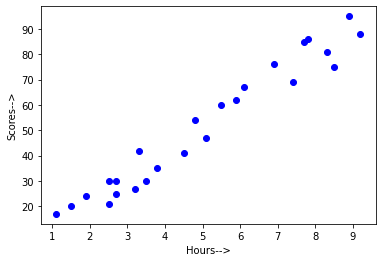

In [3]:
# Plotting the features of the dataset

plt.scatter(df.Hours,df.Scores,color='blue')
plt.xlabel('Hours-->')
plt.ylabel('Scores-->')
plt.show()

From the graph it can be infered that there is a positive linear relation between Hours and Scores

**Preparing the data**

In [4]:
# Selecting all the rows and columns except the column which has to be predicted
x=df.iloc[:,:-1].values

# Selecting the prediction attribute(Target Variable)
y=df.iloc[:,-1].values

**Train Set and Test Set**

In [5]:
# Now we divide our dataset into Train Set and Test Set using test_train_split

from sklearn.model_selection import train_test_split
hours_train,hours_test,scores_train,scores_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Training the algorithm using Scikit-Learn

In [6]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()                                     # We create an instance variable regr for LinearRegression()
regr.fit(hours_train,scores_train)                          # We fit the model with training set of Hours and Scores
print('Training Complete')

Training Complete


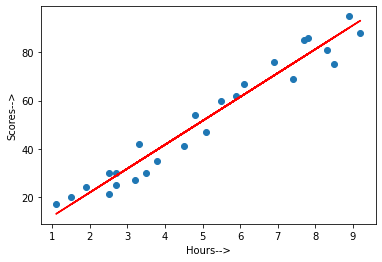

In [7]:
# Plotting the regression line

plt.scatter(x,y)
plt.plot(x,regr.coef_*x+regr.intercept_,'-r')
plt.xlabel('Hours-->')
plt.ylabel('Scores-->')
plt.show()

# Making Predictions

In [8]:
print(hours_test)    # Testing data for Hours
scores_predict=regr.predict(hours_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
# Comparing Actual vs Predicted Values
df=pd.DataFrame({'Actual':scores_test,'Predicted':scores_predict})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
# For Hours=9.25
hours=np.array(9.25).reshape(-1,1)
predict_hours=regr.predict(hours)
print('Number of Hours={}'.format(hours))
print('Predicted Score={}'.format(predict_hours))

Number of Hours=[[9.25]]
Predicted Score=[93.69173249]


## Evaluating the model

In [12]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(scores_test,scores_predict))

Mean Absolute Error: 4.183859899002982
